In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, classification_report
from skimage.transform import resize

2024-06-09 05:45:18.058513: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 05:45:18.058655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 05:45:18.324416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
class_names_mnist = [str(i) for i in range(10)]

# Preprocess MNIST data
x_train_mnist = np.expand_dims(x_train_mnist.astype('float32') / 255.0, -1)
x_test_mnist = np.expand_dims(x_test_mnist.astype('float32') / 255.0, -1)
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Load CIFAR-10 dataset
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()
class_names_cifar10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess CIFAR-10 data
x_train_cifar10 = x_train_cifar10.astype('float32') / 255.0
x_test_cifar10 = x_test_cifar10.astype('float32') / 255.0
y_train_cifar10 = to_categorical(y_train_cifar10, 10)
y_test_cifar10 = to_categorical(y_test_cifar10, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Data augmentation for CIFAR-10
datagen_cifar10 = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen_cifar10.fit(x_train_cifar10)

In [5]:
# Define MobileNet model for MNIST
def create_mobilenet_mnist(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNet(weights=None, include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Define MobileNet model for CIFAR-10
def create_mobilenet_cifar10(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNet(weights=None, include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Resize MNIST images to 32x32 pixels
x_train_mnist_resized = np.array([resize(image, (32, 32)) for image in x_train_mnist])
x_test_mnist_resized = np.array([resize(image, (32, 32)) for image in x_test_mnist])

# Train and evaluate MobileNet on resized MNIST
mobilenet_mnist = create_mobilenet_mnist(x_train_mnist_resized.shape[1:], 10)
history_mnist_mobilenet = mobilenet_mnist.fit(x_train_mnist_resized, y_train_mnist, epochs=10, validation_data=(x_test_mnist_resized, y_test_mnist))

Epoch 1/10
  10/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.1566 - loss: 2.8329  

I0000 00:00:1717911991.107328     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717911991.148088     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7115 - loss: 0.9064

W0000 00:00:1717912008.024569     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.7118 - loss: 0.9055 - val_accuracy: 0.9602 - val_loss: 0.1595
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9534 - loss: 0.1929 - val_accuracy: 0.9742 - val_loss: 0.1264
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9641 - loss: 0.1568 - val_accuracy: 0.9376 - val_loss: 0.2911
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9702 - loss: 0.1300 - val_accuracy: 0.9709 - val_loss: 0.1642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9792 - loss: 0.0939 - val_accuracy: 0.9853 - val_loss: 0.0630
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9784 - loss: 0.1071 - val_accuracy: 0.9791 - val_loss: 0.0931
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9863 - loss: 0.0593 - val_accuracy: 0.9845 - val_loss: 0.0696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9841 - loss: 0.0710 - va

In [8]:
# Train and evaluate MobileNet on CIFAR-10
mobilenet_cifar10 = create_mobilenet_cifar10(x_train_cifar10.shape[1:], 10)
history_cifar10_mobilenet = mobilenet_cifar10.fit(datagen_cifar10.flow(x_train_cifar10, y_train_cifar10, batch_size=64),
                                                  epochs=10,
                                                  validation_data=(x_test_cifar10, y_test_cifar10),
                                                  steps_per_epoch=x_train_cifar10.shape[0] // 64)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/781 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.0805 - loss: 2.9089 

W0000 00:00:1717912183.147369     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


487/781 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.1888 - loss: 2.2668

W0000 00:00:1717912214.299712     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2155 - loss: 2.1685

W0000 00:00:1717912228.584360     116 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/781 ━━━━━━━━━━━━━━━━━━━━ 75s 61ms/step - accuracy: 0.2156 - loss: 2.1679 - val_accuracy: 0.3723 - val_loss: 1.6989
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3906 - loss: 1.8518

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3906 - loss: 1.8518 - val_accuracy: 0.3711 - val_loss: 1.6996
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.3799 - loss: 1.6770 - val_accuracy: 0.4383 - val_loss: 1.5547
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.7530 - val_accuracy: 0.4401 - val_loss: 1.5454
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.4537 - loss: 1.5142 - val_accuracy: 0.4710 - val_loss: 1.5674
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.4393 - val_accuracy: 0.4655 - val_loss: 1.5843
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.4911 - loss: 1.4304 - val_accuracy: 0.4791 - val_loss: 1.7123
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5469 - loss: 1.4641 - val_accuracy: 0.4808 - val_loss: 1.6963
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5307 - loss: 1.3324 - val_accuracy: 0.554

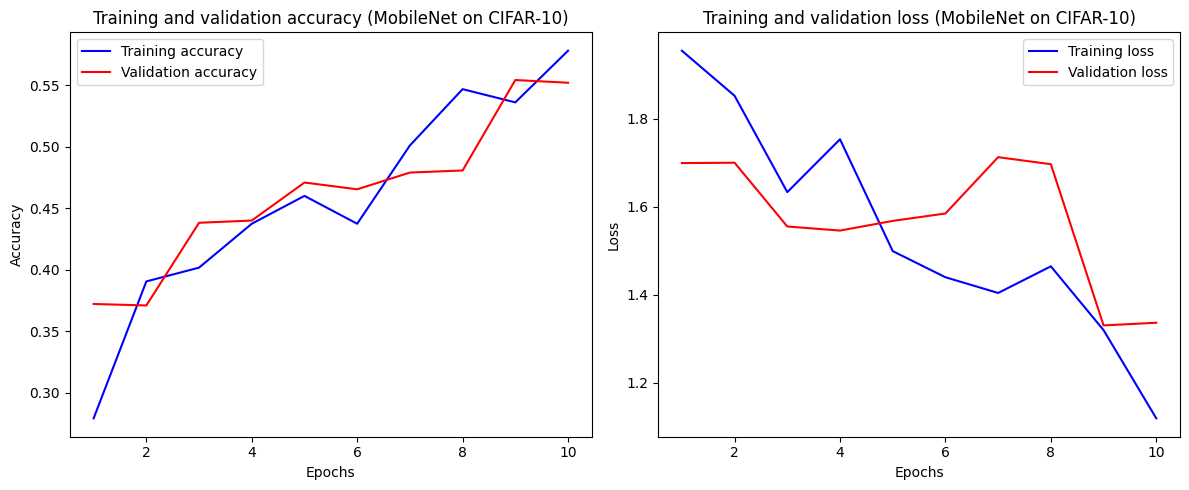

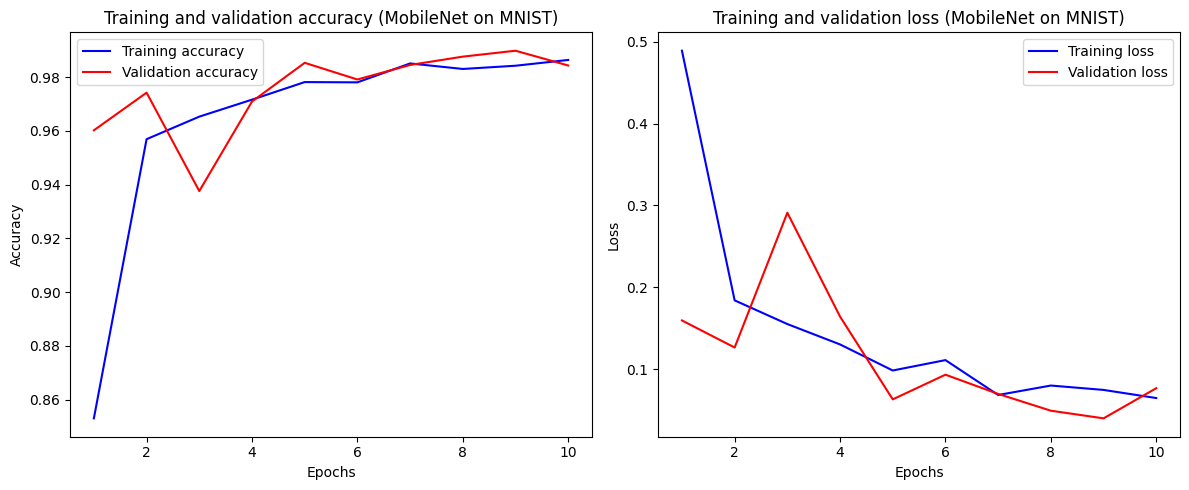

In [9]:
# Plot training history for MobileNet model
def plot_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'Training and validation accuracy ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'Training and validation loss ({title})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history_cifar10_mobilenet, 'MobileNet on CIFAR-10')
plot_training_history(history_mnist_mobilenet, 'MobileNet on MNIST')

In [10]:
# Evaluate the MobileNet model on CIFAR-10 test data
y_pred_cifar10_mobilenet = np.argmax(mobilenet_cifar10.predict(x_test_cifar10), axis=-1)
y_true_cifar10_mobilenet = np.argmax(y_test_cifar10, axis=-1)
accuracy_cifar10_mobilenet = accuracy_score(y_true_cifar10_mobilenet, y_pred_cifar10_mobilenet)
precision_cifar10_mobilenet = precision_score(y_true_cifar10_mobilenet, y_pred_cifar10_mobilenet, average='weighted')

print("\nMobileNet Model Evaluation on CIFAR-10:")
print(f"Accuracy: {accuracy_cifar10_mobilenet:.10f}")
print(f"Precision: {precision_cifar10_mobilenet:.10f}")
print(classification_report(y_true_cifar10_mobilenet, y_pred_cifar10_mobilenet, target_names=class_names_cifar10))

 57/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

W0000 00:00:1717912366.878003     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

MobileNet Model Evaluation on CIFAR-10:
Accuracy: 0.5521000000
Precision: 0.5592675699
              precision    recall  f1-score   support

    airplane       0.57      0.63      0.60      1000
  automobile       0.78      0.56      0.65      1000
        bird       0.47      0.33      0.39      1000
         cat       0.33      0.11      0.17      1000
        deer       0.48      0.46      0.47      1000
         dog       0.39      0.70      0.50      1000
        frog       0.72      0.59      0.65      1000
       horse       0.51      0.72      0.60      1000
        ship       0.73      0.68      0.71      1000
       truck       0.61      0.72      0.66      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.54     10000
weighted avg       0.56      0.55      0.54     10000



In [11]:
# Evaluate the MobileNet model on resized MNIST test data
y_pred_mnist_mobilenet = np.argmax(mobilenet_mnist.predict(x_test_mnist_resized), axis=-1)
y_true_mnist_mobilenet = np.argmax(y_test_mnist, axis=-1)
accuracy_mnist_mobilenet = accuracy_score(y_true_mnist_mobilenet, y_pred_mnist_mobilenet)
precision_mnist_mobilenet = precision_score(y_true_mnist_mobilenet, y_pred_mnist_mobilenet, average='weighted')

print("\nMobileNet Model Evaluation on MNIST:")
print(f"Accuracy: {accuracy_mnist_mobilenet:.10f}")
print(f"Precision: {precision_mnist_mobilenet:.10f}")
print(classification_report(y_true_mnist_mobilenet, y_pred_mnist_mobilenet, target_names=class_names_mnist))

 57/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

W0000 00:00:1717912371.661570     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

MobileNet Model Evaluation on MNIST:
Accuracy: 0.9843000000
Precision: 0.9844091197
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.97      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

